In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 正規分布の学習と予測(分散既知)

共役事前分布 : 正規分布

In [40]:
from scipy.stats import norm

# 訓練データの生成
mu = 5 # 真の値
sd = 1.2 # 母標準偏差
var = sd**2 # 母分散
size = 50

x = norm.rvs(loc=mu,scale=sd,size=size)
x

array([5.5335104 , 7.08848137, 5.1390345 , 4.16253096, 4.33427357,
       5.66847163, 6.45804102, 5.23951065, 4.92575573, 5.67953211,
       4.16393354, 5.47256732, 6.52415245, 3.67158557, 5.25389908,
       4.15402378, 4.36232129, 6.88929428, 7.93759707, 2.02609577,
       3.84114864, 5.32518372, 6.05896491, 5.07296732, 6.75546892,
       3.07324314, 4.43922994, 4.95810132, 6.11520961, 6.16632507,
       4.19855565, 3.73943211, 8.0072308 , 5.60409849, 4.1808775 ,
       5.99937002, 5.64436948, 5.32692923, 4.81423034, 5.55051469,
       4.78107913, 8.08818348, 4.30724901, 6.92106591, 5.66930952,
       5.34826755, 4.96815024, 3.74712075, 5.74476876, 4.03550636])

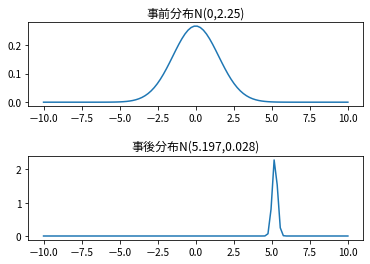

In [41]:
# 事前分布のパラメータ
mu_pre,sd_pre = 0,1.5
var_pre = sd_pre**2

# 事後分布のパラメータ
var_pro = 1/(size/(var) +1/(var_pre))
sd_pro = np.sqrt(var_pro)

mu_pro = np.sum(x)/var + mu_pre/var_pre
mu_pro *=var_pro

xscale = np.linspace(-10,10,100)
prob_pre = norm.pdf(xscale,loc=mu_pre,scale=sd_pre)
prob_pro = norm.pdf(xscale,loc=mu_pro,scale=sd_pro)

plt.figure(facecolor="white")
plt.subplot(2,1,1)
plt.plot(xscale,prob_pre)
plt.title("事前分布N("+str(mu_pre)+","+str(var_pre)+")")

plt.subplot(2,1,2)
plt.plot(xscale,prob_pro)
plt.title("事後分布N("+str(round(mu_pro,3))+","+str(round(var_pro,3))+")")
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

## 予測分布(分散既知)

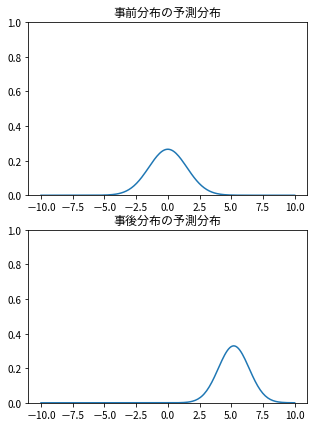

In [42]:
# 事後分布のとき
var_pro = var+var_pro

xscale = np.linspace(-10,10,200)
predict_pre = norm.pdf(xscale,loc=mu_pre,scale=sd_pre)
predict_pro = norm.pdf(xscale,loc=mu_pro,scale=np.sqrt(var_pro))

plt.figure(facecolor="white",figsize=(5,7))
plt.subplot(2,1,1)
plt.plot(xscale,predict_pre)
plt.ylim(0,1)
plt.title("事前分布の予測分布")

plt.subplot(2,1,2)
plt.plot(xscale,predict_pro)
plt.ylim(0,1)
plt.title("事後分布の予測分布")
plt.show()